Load the Dataset

In [ ]:
import pandas as pd

# Define the file path
file_path = "/content/nearest-earth-objects(1910-2024).csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display dataset information
print(df.info())  # Shows column names, data types, and missing values
print(df.head())  # Displays the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB
None
    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50             

Check for Missing Values

In [ ]:
print(df.isnull().sum())


neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


Drop rows

In [ ]:
df = df.dropna()


Remove any duplicate records

In [ ]:
df = df.drop_duplicates()

Verify Data Types

In [ ]:
print(df.dtypes)


neo_id                      int64
name                       object
absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
orbiting_body              object
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object


Check the Target Variable (is_hazardous) Distribution

<ipython-input-23-b0c08fff73c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['is_hazardous'], palette="coolwarm")


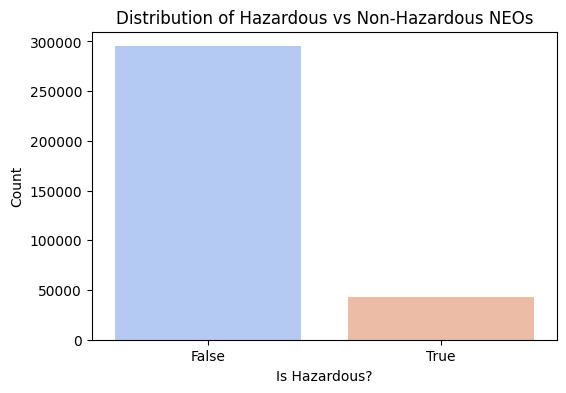

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['is_hazardous'], palette="coolwarm")
plt.title("Distribution of Hazardous vs Non-Hazardous NEOs")
plt.xlabel("Is Hazardous?")
plt.ylabel("Count")
plt.show()


Check Correlations Between Features

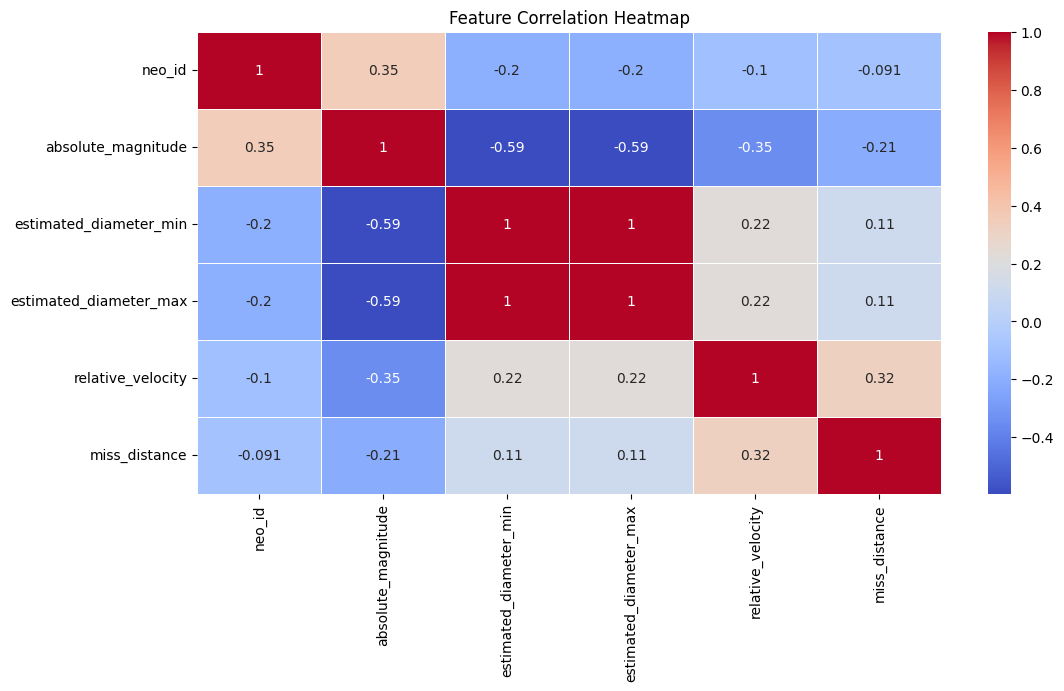

In [ ]:
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


 Visualizing NEO Sizes

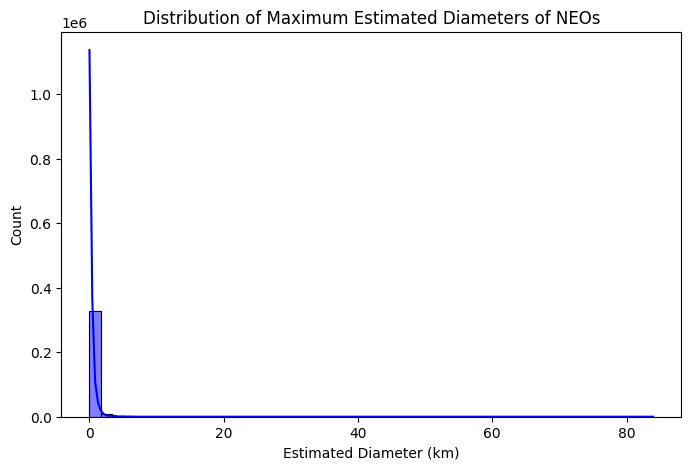

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["estimated_diameter_max"], bins=50, kde=True, color='blue')
plt.title("Distribution of Maximum Estimated Diameters of NEOs")
plt.xlabel("Estimated Diameter (km)")
plt.ylabel("Count")
plt.show()


Interactive Scatter Plot (Using Plotly)

In [ ]:
import plotly.express as px # Import the plotly.express module and assign it to the alias 'px'

fig = px.scatter(df, x="absolute_magnitude", y="estimated_diameter_max",
                 color="is_hazardous",
                 title="Magnitude vs. Diameter (Colored by Hazardous Status)")
fig.show()


Scaling Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Replace 'numerical_column1' and 'numerical_column2'
# with the actual names of your numerical columns
numerical_columns = ['absolute_magnitude', 'estimated_diameter_max']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

**Handling Imbalanced** ***Classes***

a) Oversampling (SMOTE)

In [ ]:
# Convert y to numerical categorical type (0 and 1)
y = y.astype(int)

# Apply SMOTE after converting y
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
# Assuming 'df' is your DataFrame and 'is_hazardous' is your target column
X = df.drop(columns=['is_hazardous'])  # Features
y = df['is_hazardous']  # Target

In [ ]:
# Check data types of features
print(X.dtypes)

# If you have non-numerical features, consider converting them:
# Example: Converting 'object' type to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

neo_id                      int64
name                       object
absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
orbiting_body              object
relative_velocity         float64
miss_distance             float64
dtype: object


b) Undersampling:

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_res, y_res = undersampler.fit_resample(X, y)


c) Class Weight Adjustment:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

d) Balanced Accuracy as a Metric:

In [ ]:
from sklearn.metrics import balanced_accuracy_score

y_pred = model.predict(X_test)
score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", score)


Balanced Accuracy: 0.8471097312398973


 Data Preprocessing

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Load the dataset
file_path = "/content/nearest-earth-objects(1910-2024).csv"
df = pd.read_csv(file_path)

# Display dataset info and first few rows
print("Dataset Information:\n")
print(df.info())
print("\nFirst 5 Rows:\n", df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop irrelevant columns
df_cleaned = df.drop(columns=["neo_id", "name"])

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy="mean")
numerical_cols = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max"]
df_cleaned[numerical_cols] = imputer.fit_transform(df_cleaned[numerical_cols])

# Drop 'orbiting_body' if it has only one unique value (which is "Earth")
if df_cleaned["orbiting_body"].nunique() == 1:
    df_cleaned = df_cleaned.drop(columns=["orbiting_body"])

# Scale numerical features
scaler = StandardScaler()
num_cols_to_scale = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max", "relative_velocity", "miss_distance"]
df_cleaned[num_cols_to_scale] = scaler.fit_transform(df_cleaned[num_cols_to_scale])

# Check class distribution before handling imbalance
print("\nClass Distribution Before Balancing:", Counter(df_cleaned["is_hazardous"]))

# Separate features and target variable
X = df_cleaned.drop(columns=["is_hazardous"])
y = df_cleaned["is_hazardous"]

# Split dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class Distribution After Balancing:", Counter(y_train_balanced))

# Display final dataset info
print("\nFinal Processed Dataset Shape:", df_cleaned.shape)
print("Sample of Processed Data:\n", df_cleaned.head())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB
None

First 5 Rows:
     neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (200

Model Training & Evaluation


🔹 Model Accuracy: 0.9112063867534004

🔹 Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.94      0.95     59008
        True       0.64      0.70      0.67      8632

    accuracy                           0.91     67640
   macro avg       0.80      0.82      0.81     67640
weighted avg       0.92      0.91      0.91     67640



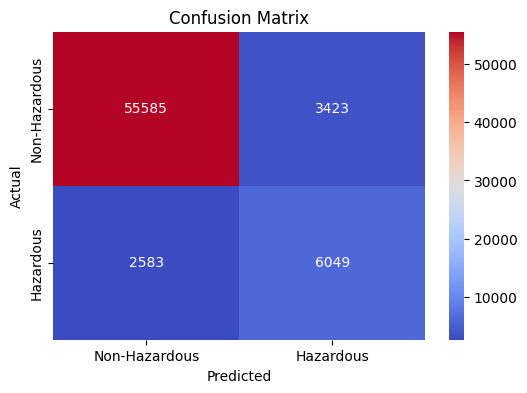

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("\n🔹 Model Accuracy:", accuracy)
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm", xticklabels=["Non-Hazardous", "Hazardous"], yticklabels=["Non-Hazardous", "Hazardous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Print new class distribution
print("Before Undersampling:", y_train.value_counts())
print("After Undersampling:", pd.Series(y_train_balanced).value_counts())


Before Undersampling: is_hazardous
False    236029
True      34530
Name: count, dtype: int64
After Undersampling: is_hazardous
False    34530
True     34530
Name: count, dtype: int64


Class Weight Adjustment in Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model with class weight adjustment
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)


Balanced Bagging Classifier

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize BalancedBaggingClassifier using 'estimator' instead of 'base_estimator'
bbc = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42, n_estimators=10)

# Train model
bbc.fit(X_train, y_train)

# Predict
y_pred = bbc.predict(X_test)


Train and Evaluate Multiple Models


🔹 Training Random Forest...

🔹 Training Logistic Regression...

🔹 Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[21:44:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





🔹 Training SVM...

📊 Model Performance Summary:

                     Accuracy  Precision    Recall  F1-score   AUC-ROC
Random Forest        0.826168   0.418670  0.932113  0.577810  0.936288
Logistic Regression  0.736413   0.311096  0.877317  0.459318  0.837691
XGBoost              0.764444   0.347851  0.966867  0.511632  0.914468
SVM                  0.706298   0.297440  0.955514  0.453660  0.836769


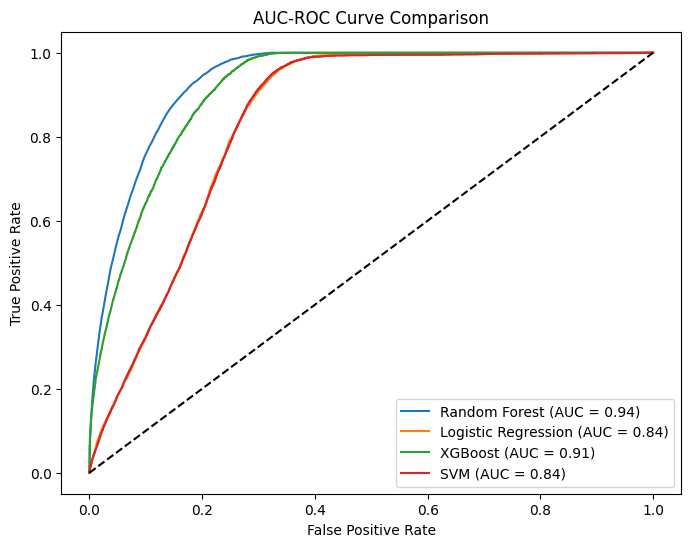

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler  # Undersampling

# Load the dataset
file_path = "/content/nearest-earth-objects(1910-2024).csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df.drop(columns=['name', 'neo_id'], inplace=True)

# Handle missing values for numerical columns only
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean()) # Fill NaNs with the mean for numerical features


# Encode categorical variable ('orbiting_body') if needed
if 'orbiting_body' in df.columns:
    df.drop(columns=['orbiting_body'], inplace=True)  # Drop since it has only "Earth"

# Split features and target variable
X = df.drop(columns=['is_hazardous'])
y = df['is_hazardous']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply Undersampling (Alternative to SMOTE)
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Scale numerical features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"),
    "Logistic Regression": LogisticRegression(random_state=42, class_weight="balanced"),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(kernel='linear', probability=True, class_weight="balanced", random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Check if '1' is in the report keys. If not, use 'True'
    positive_label = '1' if '1' in report else 'True'

    auc_roc = roc_auc_score(y_test, y_pred_prob)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": report[positive_label]['precision'],  # Change here to use positive_label
        "Recall": report[positive_label]['recall'],  # Change here to use positive_label
        "F1-score": report[positive_label]['f1-score'],  # Change here to use positive_label
        "AUC-ROC": auc_roc
    }
# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print("\n📊 Model Performance Summary:\n")
print(results_df)

# Plot AUC-ROC Curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve Comparison")
plt.legend()
plt.show()


Tune Random Forest with GridSearchCV

**Model** **SMOTE**

Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


Load Dataset

In [ ]:
data_path = "/content/nearest-earth-objects(1910-2024).csv"
df = pd.read_csv(data_path)

Data Cleaning

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


Exploratory Data Analysis (EDA)

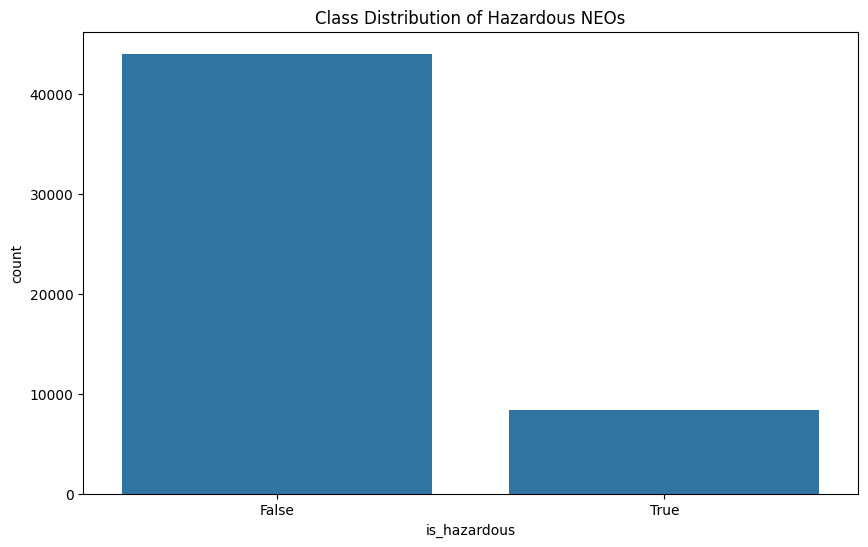

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_hazardous', data=df)
plt.title('Class Distribution of Hazardous NEOs')
plt.show()

Selecting Features and Target

In [ ]:
X = df.drop(columns=['is_hazardous'])
y = df['is_hazardous']

Encoding categorical variables

In [ ]:
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

Feature Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Handling Imbalanced Classes using SMOTE

In [ ]:
# Convert y_train to a numerical categorical type
y_train = y_train.astype(int)

# Handling Imbalanced Classes using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


 Model Training

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

Model Evaluation

In [ ]:
# Check types and convert to int if necessary
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
# Print some values for inspection
print("y_test data type:", y_test.dtype)
print("y_test unique values:", np.unique(y_test))
print("y_pred data type:", y_pred.dtype)
print("y_pred unique values:", np.unique(y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

y_test data type: int64
y_test unique values: [0 1]
y_pred data type: int64
y_pred unique values: [0 1]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      8799
           1       0.71      0.88      0.78      1668

    accuracy                           0.92     10467
   macro avg       0.84      0.91      0.87     10467
weighted avg       0.93      0.92      0.93     10467

